In [1]:
import os
try:
	os.chdir(os.path.join(os.getcwd(), 'analysis/sample_notebook'))
	print(os.getcwd())
except:
	pass

 <center><img src="https://www.kdnuggets.com/wp-content/uploads/jupyter-logo.jpg" alt="Sample Image height="340" width="480"></center><br>
 <center><font size="6" face="Roboto"><b>Sample Data Analysis Report</b></font></center>
 <center><font size="4" face="Roboto">Demonstration Notebook</font></center><br>
 <center><i><font size="3" face="Roboto">Mike Moore</font></i></center>

 # Overview

This report serves as a sample Jupyter Notebook to demonstrate a typical data analysis workflow. More information can be found at the [Jupyter Notebook](https://jupyter.org/) home page.

 # Analysis Setup and Configuration
 Our first step is to setup our analysis environment. We do this by importing the Python modules that we will make use of,
 and loading the data set we will work with. The cell below imports the modules we will need to carry out this analysis.
 We add the path to our own Python modules by appending to sys.path.

In [2]:
# Imports all needed Python modules for this notebook.
import sys, os, logging
import seaborn as sns
from os.path import expanduser
from IPython.display import Image
modules_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir, 'src'))
sys.path.append(modules_dir)
from warmups import *

## Sample Function Call
This next code block shows how to call a function that we have defined in our own module (the warmups module).

In [3]:
square_positive_numbers([3, 4, 5])

[9, 16, 25]

 ## Sample Load Data
 Once we have imported our needed modules, the next step is to load our data sets. As an example, we load financial data using Yahoo Finance and Quandl.

 ### Yahoo Finance

[*********************100%***********************]  1 of 1 completed


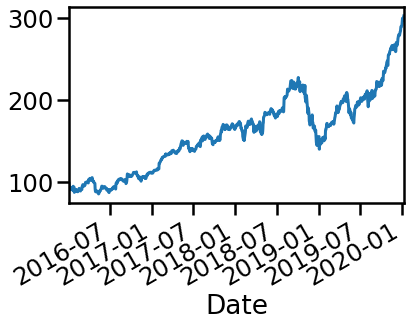

In [25]:
import yfinance as yf
# Get the data for the stock AAPL
data = yf.download('AAPL','2016-01-01','2020-01-09')
# Import the plotting library
import matplotlib.pyplot as plt
%matplotlib inline
# Plot the close price of the AAPL
data['Adj Close'].plot()
plt.show()

### Quandl
Be sure to place your Quandl API key instead of "YOUR_KEY_HERE". See [here](https://www.quandl.com) for more information.

In [12]:
# Import the quandl package
import quandl
# Get the data from quandl
data = quandl.get("WIKI/MSFT", start_date="2016-01-01", end_date="2020-01-09", api_key="YOUR_KEY_HERE")
# Plot the close pr
import matplotlib.pyplot as plt
data.Close.plot()
# Show the plot
plt.show()

 ## Examine Data
 At this stage, our variable 'data' contains a Pandas [DataFrame](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)
 object containing all of our data. We can used Pandas to examine some of the data that was loaded in to this Jupyter Notebook.

In [13]:
n_rows = 10
data.head(n_rows)

Open     High      Low  Close      Volume  Ex-Dividend  \
Date                                                                  
2016-01-04  54.32  54.8000  53.3900  54.80  53777963.0          0.0   
2016-01-05  54.93  55.3900  54.5400  55.05  34079674.0          0.0   
2016-01-06  54.32  54.4001  53.6400  54.05  39518863.0          0.0   
2016-01-07  52.70  53.4850  52.0700  52.17  56564852.0          0.0   
2016-01-08  52.37  53.2800  52.1500  52.33  48753969.0          0.0   
2016-01-11  52.51  52.8500  51.4600  52.30  36943756.0          0.0   
2016-01-12  52.76  53.1000  52.0600  52.78  36095539.0          0.0   
2016-01-13  53.80  54.0700  51.3038  51.64  66883571.0          0.0   
2016-01-14  52.00  53.4163  51.5700  53.11  52381918.0          0.0   
2016-01-15  51.31  51.9700  50.3400  50.99  71820697.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2016-01-04          1.0  51.724533  52.181598  50.838969   52.181598   
2016-01-05          1.0  52.305386  52.743407  51.934021   52.419653   
2016-01-06          1.0  51.724533  51.800805  51.077024   51.467434   
2016-01-07          1.0  50.181938  50.929430  49.582040   49.677262   
2016-01-08          1.0  49.867706  50.734225  49.658218   49.829617   
2016-01-11          1.0  50.001016  50.324771  49.001187   49.801050   
2016-01-12          1.0  50.239071  50.562826  49.572518   50.258116   
2016-01-13          1.0  51.229379  51.486478  48.852450   49.172586   
2016-01-14          1.0  49.515385  50.864012  49.105931   50.572348   
2016-01-15          1.0  48.858354  49.486818  47.934701   48.553644   

            Adj. Volume  
Date                     
2016-01-04   53777963.0  
2016-01-05   34079674.0  
2016-01-06   39518863.0  
2016-01-07   56564852.0  
2016-01-08   48753969.0  
2016-01-11   36943756.0  
2016-01-12   36095539.0  
2016-01-13   66883571.0  
2016-01-14   52381918.0  
2016-01-15   71820697.0

 ## Post-Processing
 Now that we have our data in a convenient structure, we can leverage the full power of Pandas, NumPy, and Matplotlib to process and
 analyze the data with ease. Of course, we can create functions, classes, and modules defined in separate Python files if we need to do
 some complex post-processing. This would allow us to share those modules with other team members that may want to re-use and extend them
 for a similar analysis. Be sure to test drive these modules as you develop them. As we have seen, the interactive nature of Python makes
 that easy.

 As a trivial example, here's how to get the maximum closing price of the stock.

In [16]:
max_closing_price = data['Close'].max()
print("The maximum closing price for the stock in the given data set is : $ {:.2f}.".format(max_closing_price))

The maximum closing price for the stock in the given data set is : $ 96.77.


 ## Make Some Simple Plots
 In addition to using Pandas in combination with NumPy for post-processing, we can also use Pandas in
 combination with Matplotlib for plotting. Here's an example that you can experiment with.

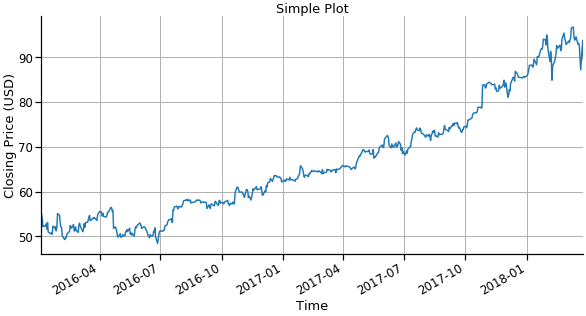

In [17]:
width = 20
height = 10
sns.set_context("poster", font_scale=1.1)
fig = plt.figure(figsize=(width, height), dpi=35)
axis = fig.add_subplot(111)
data['Close'].plot(ax=axis)
axis.grid(True)
axis.set_title('Simple Plot')
axis.set_xlabel('Time')
axis.set_ylabel('Closing Price (USD)')
sns.despine()